# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,isqlite-00001-00006,"['--disable-shared', '--disable-largefile', '-...",70.9171,0.0008,0.0000,10190888
1,isqlite-00001-00015,"['--disable-shared', '--disable-largefile', '-...",27.4858,0.0009,0.0000,9648880
2,isqlite-00001-00012,"['--disable-shared', '--disable-libtool-lock',...",0.5044,0.0001,0.0008,9648880
3,isqlite-00001-00014,"['--disable-shared', '--disable-option-checkin...",31.7364,0.0000,0.0009,9648880
4,isqlite-00001-00005,"['--disable-shared', '--disable-amalgamation',...",0.0112,0.0000,0.0008,9648880
...,...,...,...,...,...,...
375,isqlite-00020-00016,"['--disable-shared', '--disable-libtool-lock',...",29.2025,0.0007,0.0001,10084648
376,isqlite-00020-00013,"['--disable-shared', '--disable-largefile', '-...",22.1599,0.0000,0.0009,10084648
377,isqlite-00020-00018,"['--disable-shared', '--disable-libtool-lock',...",26.0406,0.0000,0.0009,10084648
378,isqlite-00020-00003,"['--disable-shared', '--disable-largefile', '-...",0.0115,0.0008,0.0002,10084648


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,isqlite-00012-00001,0.0108,10147616
00001,00004,isqlite-00004-00001,0.0107,10199640
00001,00002,isqlite-00002-00001,0.0127,10173424
00001,00005,isqlite-00005-00001,0.0125,10147616
00001,00006,isqlite-00006-00001,27.4372,10201208
...,...,...,...,...
00020,00005,isqlite-00005-00020,34.3997,10147616
00020,00003,isqlite-00003-00020,0.0100,9699272
00020,00019,isqlite-00019-00020,0.0121,10203840


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])
#opt2.unstack()
opt2

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN   0.0127  23.7159   0.0107   0.0125  27.4372   0.0107   
00002     0.0109      NaN  26.0040   0.0108   0.0109  26.9628   0.0137   
00003    30.4597  30.4352      NaN  30.9790  32.1443   0.0099  33.8728   
00004     0.0109   0.0132  29.2117      NaN   0.0131  30.4134   0.0132   
00005     0.0112   0.0125  29.0459   0.0106      NaN  30.4819   0.0107   
00006    70.9171  70.7629   0.0100  32.9366  72.0975      NaN  75.4570   
00007     0.0126   0.0124  23.7827   0.0108   0.0140  25.9006      NaN   
00008    26.0758  26.1569   0.0103  26.1166  27.7835   0.0113  27.7226   
00009    32.7310  32.7111   0.0102  32.9521  39.8640   0.0123  34.3770   
00010    32.3073  32.3586   0.0101  32.2981  33.8282   0.0115  35.2753   
00011    28.5157  28.5050   0.0099  28.3879  31.2868   0.0126  31.3077   
00012     0.5044   0.5328  29.2421   0.0125   0.6467  31.3817   0.5201   
00013     0.0110   0.0107  20.9391   0.0124   0.0108  21.2226   0.0135   
00014    31.7364  31.6781   0.0101  31.8073  37.2004   0.0122  33.6787   
00015    27.4858  27.6350   0.0099  27.6014  33.7895  63.4205  28.8401   
00016     0.0129   0.0126  27.5432   0.0126   0.0117  28.1396   0.0111   
00017     0.0109   0.0128  29.0944   0.0107   0.0138  33.0004   0.0129   
00018     0.0124   0.0127  24.8094   0.0110   0.0134  25.6645   0.0143   
00019    32.9460  32.8728   0.0115  32.9654  36.4089   0.0123  33.5112   
00020    32.0953  32.1530   0.0100  32.1790  34.3997   0.0116  34.7503   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  23.7721  24.2855  23.6308  23.5534   0.0108   0.0107  23.9807  23.4938   
00002  26.3014  27.8780  26.1497  27.9633   0.0177   0.0107  26.1794  28.2150   
00003   0.0097   0.0118   0.0100   0.0115  33.8720  31.6413   0.0115   0.0122   
00004  32.6905  33.6484  31.7132  29.5245   0.0111   0.0124  32.1900  30.9197   
00005  30.8381  29.9389  30.5661  29.2825   0.5604   0.0134  30.8388  29.1669   
00006   0.1734   0.0114  73.1785   0.0099  72.4604  36.7186  74.1240   0.0101   
00007  24.5862  26.1805  25.3708  24.0949   0.0109   0.0106  28.1903  25.7233   
00008      NaN   0.0116   0.0097   0.0097  26.3706  27.9610   0.0104   0.0098   
00009   0.0096      NaN   0.0113   0.0098  35.1971  35.7647   0.0113   0.0122   
00010   0.0120   0.0100      NaN   0.0100  34.4103  37.4231   0.0124   0.0121   
00011   0.0099   0.0114   0.0096      NaN  28.7579  30.8811   0.0099   0.0100   
00012  30.6096  30.5137  31.2309  29.2680      NaN   0.0123  31.6296  29.1103   
00013  21.2309  21.0505  21.0160  21.7199   0.0109      NaN  21.3958  21.1114   
00014   0.0122   0.0130   0.0110   0.0098  31.6972  35.6217      NaN   0.0100   
00015   0.0113   0.0101   0.0120   0.0099  27.8718  29.2386   0.0123      NaN   
00016  27.9539  28.0893  27.7321  27.5442   0.0127   0.0138  27.8839  27.6250   
00017  29.7536  31.1659  29.4755  29.0315   0.0109   0.0109  31.0203  30.7562   
00018  25.2470  25.5907  24.8978  26.2737   0.0107   0.0135  27.2416  25.7513   
00019   0.0101   0.0110   0.0098   0.0100  34.6035  35.8108   0.0106   0.0098   
00020   0.0124   0.0100   0.0102   0.0112  32.2838  36.6088   0.0119   0.0099   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001   0.0123   0.0108   0.0125  24.3950  24.8351  
00002   0.0106   0.0107   0.0128  27.2273  27.7516  
00003  30.7610  30.5972  30.4627   0.0115   0.0115  
00004   0.0226   0.0107   0.0125  30.4492  29.8126  
00005   0.0148   0.0107   0.0123  30.9076  29.8505  
00006  34.6666 

In [155]:
# The order or configurations that provide the minimum incremental build time.

opt2['MIN'] = opt2.apply( lambda x: opt2.columns[x == x.min()][0], axis=1)
opt2 = opt2[['MIN']]
opt2

MIN
Br2   Br1               
00001 00002  Binary Size
      00003  Binary Size
      00004  Binary Size
      00005  Binary Size
      00006  Binary Size
...                  ...
00020 00015  Binary Size
      00016  Binary Size
      00017  Binary Size
      00018  Binary Size
      00019  Binary Size

[380 rows x 1 columns]

In [5]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                             \
Br1         00001       00002      00003       00004       00005       00006   
Br2                                                                            
00001         NaN  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00002   9648880.0         NaN  9699272.0  10199640.0  10147616.0  10201208.0   
00003   9648880.0  10173424.0        NaN  10199640.0  10147616.0  10201208.0   
00004   9648880.0  10173424.0  9699272.0         NaN  10147616.0  10201208.0   
00005   9648880.0  10173424.0  9699272.0  10199640.0         NaN  10201208.0   
00006  10190888.0  10201208.0  9699272.0  10199640.0  10190888.0         NaN   
00007   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00008   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00009   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00010   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00011   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00012   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00013   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00014   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00015   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0   8960648.0   
00016   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00017   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00018   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00019   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00020   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   

                                                                              \
Br1         00007      00008       00009       00010       00011       00012   
Br2                                                                            
00001   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00002   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00003   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00004   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00005   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00006  10190888.0  8528944.0  10190120.0  10201208.0  10215824.0  10190888.0   
00007         NaN  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00008   8464736.0        NaN  10190120.0  10106296.0  10215824.0  10147616.0   
00009   8464736.0  8528944.0         NaN  10106296.0  10215824.0  10147616.0   
00010   8464736.0  8528944.0  10190120.0         NaN  10215824.0  10147616.0   
00011   8464736.0  8528944.0  10190120.0  10106296.0         NaN  10147616.0   
00012   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0         NaN   
00013   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00014   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00015   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00016   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00017   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00018   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00019   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00020   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   

                                                                            \
Br1        00013       00014      00015      00016       00017       00018   
Br2                                                                          
00001  8566104.0  10075160.0  8960648.0  9986640.0  10123416.0   8656016.0   
00002  85661

In [6]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,27.4372,12.800168,0.0107
00002,28.2150,14.249542,0.0106
00003,33.8728,16.596042,0.0097
00004,33.6484,16.352258,0.0107
00005,30.9076,15.872305,0.0106
00006,75.4570,47.580158,0.0099
00007,28.1903,13.325621,0.0106
00008,28.5043,14.148079,0.0097


In [7]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00012,31.6296,16.163674,0.0109
00016,29.2025,14.761389,0.0109
00001,27.4372,12.800168,0.0107
00017,33.0004,16.007263,0.0107
00013,22.1599,11.240232,0.0107
00018,27.2416,13.556853,0.0107
00004,33.6484,16.352258,0.0107
00007,28.1903,13.325621,0.0106


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

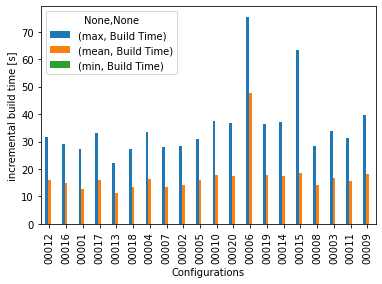

In [8]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

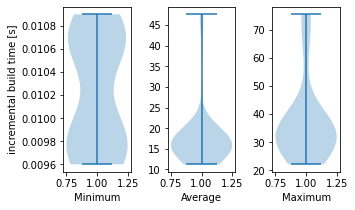

In [9]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()